In [1]:
import subtractr
import jax
import jax.numpy as jnp
import os
import h5py
import numpy as np

In [2]:
dataset_path = '../data/masato/B6WT_AAV_hsyn_chrome2f_gcamp8/e_e_map/preprocessed/220308_B6_Chrome2fGC8_030822_Cell2_opsPositive_A_planes_cmReformat.mat'
dset_name = os.path.basename(dataset_path)

with h5py.File(dataset_path) as f:
    pscs = np.array(f['pscs']).T
    stim_mat = np.array(f['stimulus_matrix']).T
    targets = np.array(f['targets']).T
    powers = np.max(stim_mat, axis=0)

stim_start = 100
stim_end = 200
batch_size = 100

# sort traces by magnitude around stim
idxs = np.argsort(np.linalg.norm(
    pscs[:, stim_start:stim_end+50], axis=-1))[::-1]
sorted_pscs = pscs[idxs, :]

num_complete_batches = pscs.shape[0] // batch_size
max_index = num_complete_batches * batch_size
folded_traces = sorted_pscs[:max_index].reshape(
    num_complete_batches, batch_size, pscs.shape[1])


In [3]:
# get the first batch,
# run the coordinate descent nmu function on it
# to see whether rank=2 works
batch = folded_traces[0][:, 0:stim_end]

U, V, beta, loss = subtractr.low_rank.coordinate_descent_nmu(batch, stim_start=stim_start, rank=2, max_iters=5)
est = U @ V + beta


Text(0.5, 1.0, 'V')

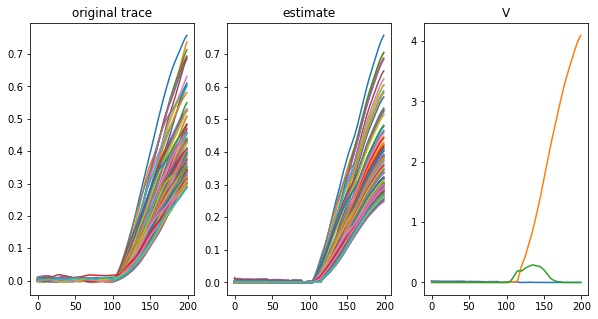

In [4]:
# plot original data alongside estimate, put plots in separate columns
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 3, figsize=(10, 5))

axs[0].plot(batch.T)
axs[0].set_title('original trace')

axs[1].plot(est.T)
axs[1].set_title('estimate')

axs[2].plot(V.T)
axs[2].set_title('V')

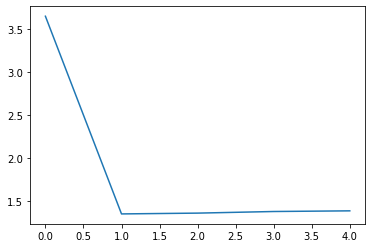

In [5]:
plt.plot(loss)